# Análise de fatores impactantes em vendas de veículos

## Introdução

Este estudo fornece informações detalhadas sobre veículos, incluindo variáveis como preço, renda anual, cor, marca e gênero dos compradores. Com base nessas informações, é possível realizar análises exploratórias para entender as tendências de consumo e identificar padrões de comportamento no mercado automotivo. A análise desses dados pode revelar insights sobre como fatores socioeconômicos, como a renda anual e o gênero, influenciam as escolhas dos consumidores em relação ao preço e às características dos veículos. Esse tipo de estudo é fundamental para empresas do setor automotivo, pois permite a personalização de estratégias de marketing, vendas e distribuição, atendendo melhor às necessidades e preferências dos consumidores.








## Importando bibliotecas

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Lendo os dados do arquivo

In [24]:
def load_data(file_path):
    try:
        data = pd.read_csv(file_path, encoding='ISO-8859-1', delimiter=';')
        print("Dados carregados com sucesso!")
        return data
    except FileNotFoundError:
        print(f"Erro: Arquivo não encontrado em {file_path}")
        return None
    except Exception as e:
        print(f"Erro ao carregar os dados: {e}")
        return None

A função `load_data` tem como objetivo carregar um arquivo CSV a partir de um caminho especificado. Ela utiliza a biblioteca pandas para ler o arquivo, configurando a codificação como `'ISO-8859-1'` e o delimitador como `';'`. Se o arquivo for carregado com sucesso, a função retorna o DataFrame com os dados. Caso haja algum erro, como o arquivo não ser encontrado, a função captura a exceção `FileNotFoundError` e exibe uma mensagem de erro, retornando `None`. Se ocorrer qualquer outro erro durante o carregamento, ele é capturado por uma exceção genérica e uma mensagem de erro é exibida, também retornando `None`.

## Tratando os dados

In [3]:
def clean_data(data):
    data = data.dropna()  # Remover valores nulos

    # Correções adicionais
    data['Renda anual'] = data['Renda anual'].abs()  # Garantir valores positivos
    data['Preço'] = data['Preço'].abs()  # Garantir valores positivos

    print("Dados limpos com sucesso!")
    return data


## Diversidades das colunas

In [5]:
# Caminho do arquivo CSV
file_path = "C:\\Users\\Koschek\\Downloads\\ATUALIZADOS.csv"

try:
    # Especifica o delimitador como ponto e vírgula
    df = pd.read_csv(file_path, sep=';', encoding='latin1')

    # Exibe os dados formatados como uma tabela
    from IPython.display import display  # Apenas para notebooks
    display(df.head())  # Exibe as primeiras 5 linhas da tabela
except FileNotFoundError:
    print(f"Erro: O arquivo '{file_path}' não foi encontrado. Verifique o caminho.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o arquivo: {e}")

,data,Nome,Gênero,Renda anual,Marca,Modelo,Transmissão,Cor,Preço,Carroceria,Cidade
0,01/02/2022,Geraldine,Masculino,13500,Ford,Expedition,Automático,Preto,130000,SUV,Middletown
1,01/02/2022,Gia,Masculino,1480000,Dodge,Durango,Automático,Preto,95000,SUV,Aurora
2,01/02/2022,Gianna,Masculino,1035000,Cadillac,Eldorado,Manual,Vermelho,157500,Sedan,Greenville
3,01/02/2022,Giselle,Masculino,13500,Toyota,Celica,Manual,Branco,70000,SUV,Pasco
4,01/02/2022,Grace,Masculino,1465000,Acura,TL,Automático,Vermelho,122500,Hatchback,Janesville


## Análise exploratória

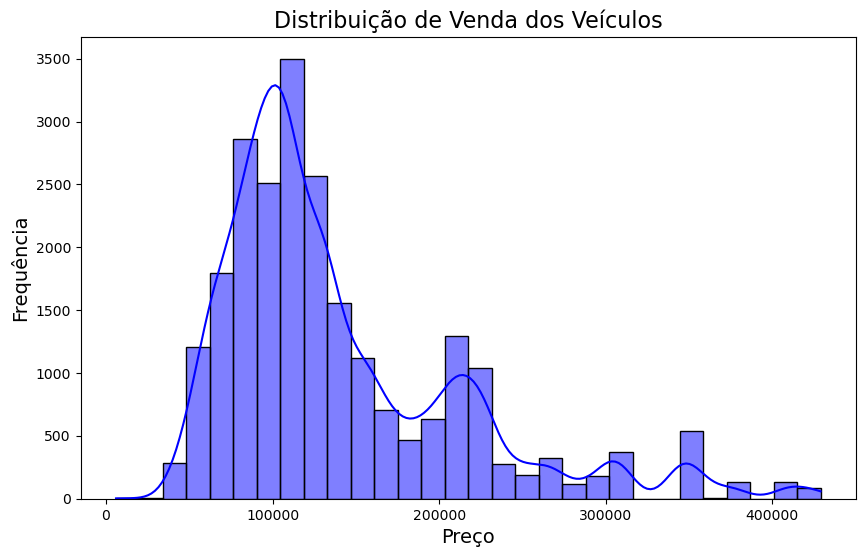

In [18]:
# Gráfico 1: Distribuição de preços
plt.figure(figsize=(10, 6))
sns.histplot(data['Preço'], bins=30, kde=True, color='blue')
plt.title('Distribuição de Venda dos Veículos', fontsize=16)
plt.xlabel('Preço', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.show()


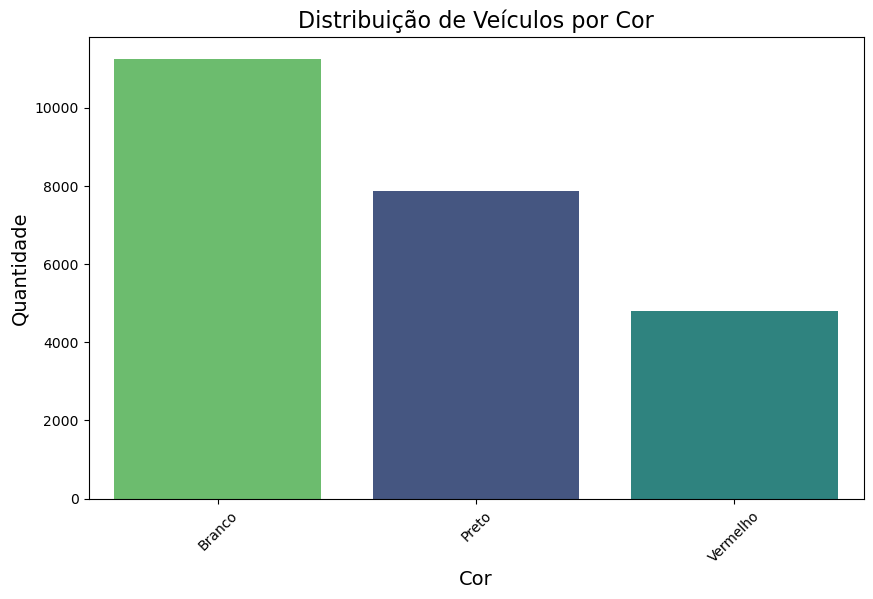

In [74]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Cor', hue='Cor', palette='viridis', order=data['Cor'].value_counts().index, legend=False)
plt.title('Distribuição de Veículos por Cor', fontsize=16)
plt.xlabel('Cor', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
plt.xticks(rotation=45)
plt.show()


**1 - Quais características técnicas e econômicas afetam a decisão de
compra de um veículo?**

Analisando os gráficos acima, podemos perceber que as pessoas têm uma preferência maior por carros de cores neutras (nesse caso branco e preto, respectivamente), tal como possuem mais atração por carros mais baratos (por volta dos R$100.000).

A cor vermelha, apesar de não ser neutra, aparece na 3ª posição, sendo a não-neutra mais preferida entre os compradores.

C:\Users\Koschek\AppData\Local\Temp\ipykernel_22020\3490877090.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_count = data.groupby('Faixa Renda Anual')['Preço'].count().reset_index()
C:\Users\Koschek\AppData\Local\Temp\ipykernel_22020\3490877090.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_count, x='Faixa Renda Anual', y='Quantidade', palette='coolwarm', dodge=False)


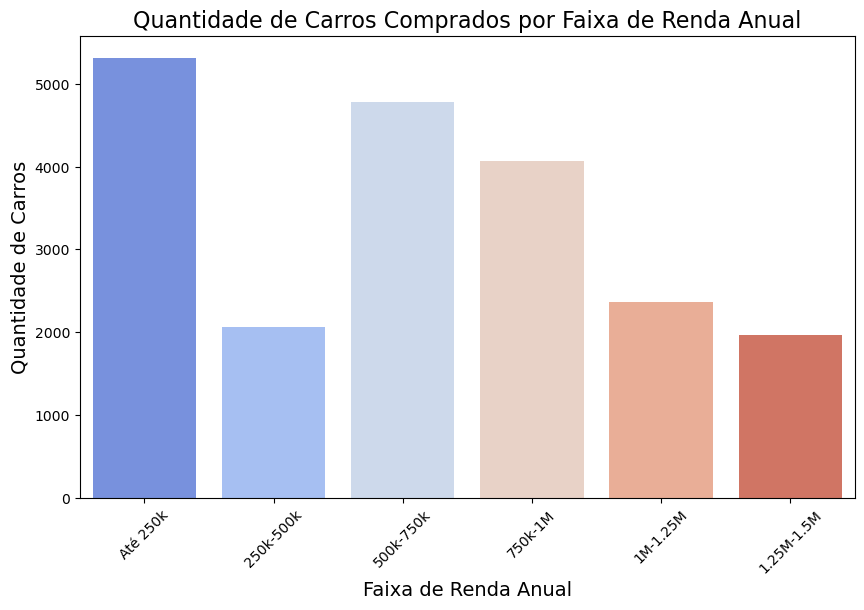

In [16]:
# Agrupando os dados para contar a quantidade de carros em cada faixa de renda anual
summary_count = data.groupby('Faixa Renda Anual')['Preço'].count().reset_index()
summary_count.rename(columns={'Preço': 'Quantidade'}, inplace=True)

bins = [0, 250000, 500000, 750000, 1000000, 1250000, 1500000]
labels = ['Até 250k', '250k-500k', '500k-750k', '750k-1M', '1M-1.25M', '1.25M-1.5M']
data['Faixa Renda Anual'] = pd.cut(data['Renda anual'], bins=bins, labels=labels, right=False)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=summary_count, x='Faixa Renda Anual', y='Quantidade', palette='coolwarm', dodge=False)
plt.title('Quantidade de Carros Comprados por Faixa de Renda Anual', fontsize=16)
plt.xlabel('Faixa de Renda Anual', fontsize=14)
plt.ylabel('Quantidade de Carros', fontsize=14)
plt.xticks(rotation=45)
plt.show()

**2. Como os padrões de consumo de veículos variam entre regiões e
faixas de renda?**

No gráfico acima, podemos perceber que pessoas inseridas no grupo de Renda Anual <250.000 compram carros mais baratos, dado diretamente proporcional ao usado para responder à pergunta nº1, que diz que os carros mais vendidos estão com preços próximos de "R$100.000".

É possível observar também que temos um leve aumento nas vendas de carros de RS 200.000 - RS 230.000, o que se deve ao fato de haver mais pessoas inseridas no grupo que possui renda anual entre RS 250.000 e RS 500.000

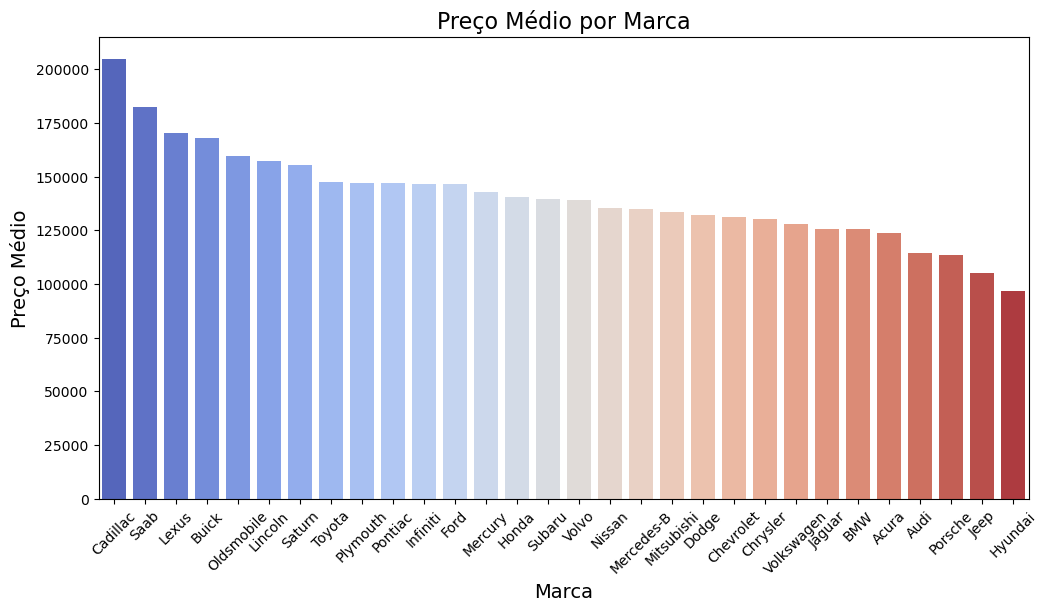

In [78]:
avg_price_by_brand = data.groupby('Marca')['Preço'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_brand, x='Marca', y='Preço', hue='Marca', palette='coolwarm', dodge=False, legend=False)
plt.title('Preço Médio por Marca', fontsize=16)
plt.xlabel('Marca', fontsize=14)
plt.ylabel('Preço Médio', fontsize=14)
plt.xticks(rotation=45)
plt.show()


No gráfico acima podemos perceber que veículos da marca Cadillac são os mais caros e que a marca Hyundai possui os menores preços médios.

**3 - Qual é o impacto das condições macroeconômicas nas vendas de
carros?**

Com base nos diagramas apresentados, é possível observar que existem várias relações entre a cor dos veículos, o preço dos mesmos e a condição financeira dos clientes, e esses fatores exercem uma influência direta e significativa nas escolhas dos consumidores no momento da compra. A cor dos veículos, por exemplo, pode refletir preferências pessoais ou tendências de mercado, enquanto o preço dos veículos é um dos principais determinantes na decisão de compra, uma vez que ele está diretamente relacionado ao poder aquisitivo dos clientes. Além disso, a condição financeira dos clientes, medida pela sua renda anual, também desempenha um papel crucial, já que ela determina as faixas de preço que são acessíveis para cada grupo, impactando suas opções e escolhas no processo de aquisição do veículo.